<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Read-and-plot-resampled-radiances" data-toc-modified-id="Read-and-plot-resampled-radiances-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Read and plot resampled radiances</a></span></li><li><span><a href="#Make-a-projection-from-proj4-parameters" data-toc-modified-id="Make-a-projection-from-proj4-parameters-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Make a projection from proj4 parameters</a></span></li><li><span><a href="#Plot-the-image-using-cartopy" data-toc-modified-id="Plot-the-image-using-cartopy-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plot the image using cartopy</a></span><ul class="toc-item"><li><span><a href="#Create-a-palette" data-toc-modified-id="Create-a-palette-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Create a palette</a></span></li><li><span><a href="#use-the-palette-on-the-image_30-array" data-toc-modified-id="use-the-palette-on-the-image_30-array-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>use the palette on the image_30 array</a></span></li></ul></li></ul></div>

# Read and plot resampled radiances

This notebook shows how to plot the image written out by the
cartopy_resample_ch30 notebook


In [1]:
import a301
from pathlib import Path
import json
from a301.utils.data_read import download
import pprint
import shutil
import json
import pprint
import cartopy
import numpy as np
from matplotlib import pyplot as plt


In [2]:
# read in the resampled image

In [3]:
in_dir_name="ch30_resample"
in_dir = a301.root_dir / Path('test_data') / Path(in_dir_name)
image_name= in_dir / Path(f"{in_dir_name}.npz")
json_name = in_dir / Path(f"{in_dir_name}.json")
image_dict=np.load(image_name)
with open(json_name,'r') as f:
    meta_dict=json.load(f)

In [4]:
print(list(image_dict.keys()))

['ch30_resample']


In [5]:
image_30=image_dict['ch30_resample']

In [6]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt


# Make a projection from proj4 parameters

a301.geometry.make_projection

In [7]:
def make_projection(proj_params):
    """
    turn a set of proj4 parameters into a cartopy laea projection
    
    Parameters
    ----------
    
    proj_params: dict
       dictionary with parameters lat_0, lon_0 datum and ellps
       
    Returns
    -------
    
    cartopy projection object
    
    """
    import cartopy.crs as ccrs
    globe_w = ccrs.Globe(datum=proj_params["datum"],ellipse=proj_params['ellps'])
    projection_w=ccrs.LambertAzimuthalEqualArea(central_latitude=float(proj_params['lat_0']),
                    central_longitude= float(proj_params['lon_0']),globe=globe_w)
    return projection_w

In [8]:
cartopy_crs = make_projection(meta_dict['proj_params'])

# Plot the image using cartopy

## Create a palette

We want to spread the colors over a limited range of values between 0.1 and 7 W/m^2/microns/sr so we
will set over and under colors and normalize the data to this range

 Some links about colors:
 
* [rods, cones and rgb](https://theneurosphere.com/2015/12/17/the-mystery-of-tetrachromacy-if-12-of-women-have-four-cone-types-in-their-eyes-why-do-so-few-of-them-actually-see-more-colours/)

* [matplotlib palettes](https://matplotlib.org/examples/color/colormaps_reference.html)
 
* [xkcd color survey](https://blog.xkcd.com/2010/05/03/color-survey-results/)
 
* [xkcd colors from matplotlib](https://seaborn.pydata.org/generated/seaborn.xkcd_palette.html)
 
* [wikipedia article on RGB colors](https://en.wikipedia.org/wiki/RGB_color_model)


In [9]:
pal = plt.get_cmap('plasma')
pal.set_bad('0.75') #75% grey for out-of-map cells
pal.set_over('r')  #color cells > vmax red
pal.set_under('k')  #color cells < vmin black
vmin= 0.1
vmax= 7.0
from matplotlib.colors import Normalize
the_norm=Normalize(vmin=vmin,vmax=vmax,clip=False)

## use the palette on the image_30 array

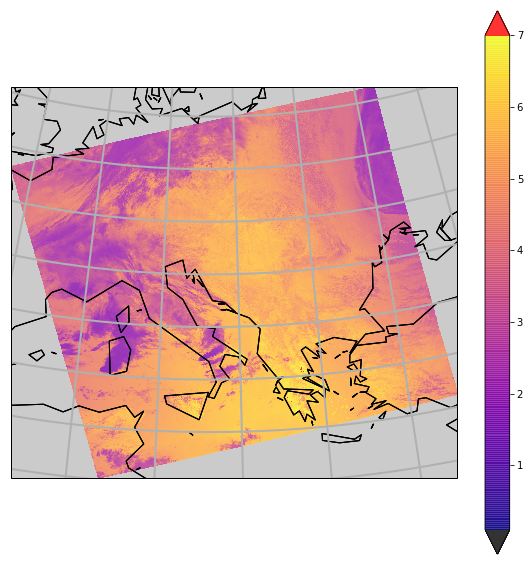

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10,10),
                          subplot_kw={'projection': cartopy_crs})
ax.gridlines(linewidth=2)
ax.add_feature(cartopy.feature.GSHHSFeature(scale='coarse', levels=[1,2,3]));
ax.set_extent(meta_dict['extent'],cartopy_crs)
cs=ax.imshow(image_30, transform=cartopy_crs, extent=meta_dict['extent'], 
             origin='upper',alpha=0.8,cmap=pal,norm=the_norm)
fig.colorbar(cs,extend='both');